In [1]:
%%time
import malaya

CPU times: user 12.2 s, sys: 1.49 s, total: 13.7 s
Wall time: 17.3 s


## List available deep learning Dependency models

In [2]:
malaya.dependency.available_deep_model()

['concat', 'bahdanau', 'luong', 'attention-is-all-you-need']

## Describe supported dependencies

In [3]:
malaya.describe_dependency()

acl - clausal modifier of noun
advcl - adverbial clause modifier
advmod - adverbial modifier
amod - adjectival modifier
appos - appositional modifier
aux - auxiliary
case - case marking
ccomp - clausal complement
compound - compound
compound:plur - plural compound
conj - conjunct
cop - cop
csubj - clausal subject
dep - dependent
det - determiner
fixed - multi-word expression
flat - name
iobj - indirect object
mark - marker
nmod - nominal modifier
nsubj - nominal subject
obj - direct object
parataxis - parataxis
root - root
xcomp - open clausal complement
you can read more from https://universaldependencies.org/en/dep/xcomp.html


In [4]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

## Load CRF model

In [5]:
crf = malaya.dependency.crf()
d_object, tagging, indexing = crf.predict(string)
tagging, indexing

([('Dr', 'case'),
  ('Mahathir', 'obl'),
  ('menasihati', 'acl'),
  ('mereka', 'obj'),
  ('supaya', 'case'),
  ('berhenti', 'xcomp'),
  ('berehat', 'advcl'),
  ('dan', 'cc'),
  ('tidur', 'conj'),
  ('sebentar', 'advmod'),
  ('sekiranya', 'advmod'),
  ('mengantuk', 'UNK'),
  ('ketika', 'case'),
  ('memandu', 'xcomp')],
 [('Dr', 3),
  ('Mahathir', 6),
  ('menasihati', 4),
  ('mereka', 4),
  ('supaya', 8),
  ('berhenti', 10),
  ('berehat', 10),
  ('dan', 14),
  ('tidur', 4),
  ('sebentar', 12),
  ('sekiranya', 9),
  ('mengantuk', 1),
  ('ketika', 9),
  ('memandu', 7)])

## Visualize graph for dependency output

**Make sure you already installed graphvis.**

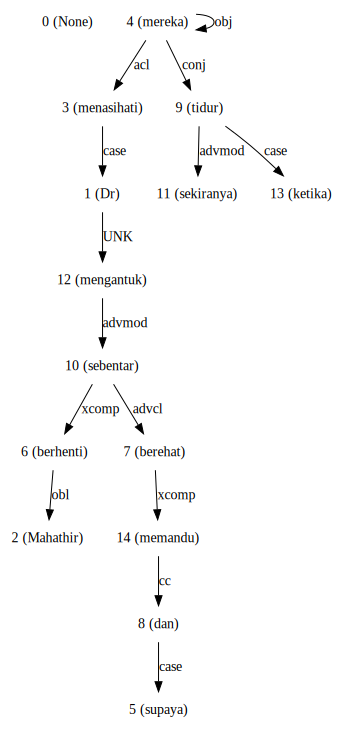

In [6]:
d_object.to_graphvis()

## Print important features from CRF model

In [7]:
crf.print_features(10)

Top-10 tagging positive:
12.547764 conj     next_word:perlunya
12.367710 punct    word:mengembanfkan
11.793032 nummod   word:mengembanfkan
10.094637 det      word:berbagai
9.573215 case     word:dari
9.210329 appos    word:dimekarkannya
9.153894 det      word:para
9.128825 root     word:fasilitator
9.055041 obl      next_word:ditafsirkan
9.013166 case     word:dengan

Top-10 tagging negative:
-4.373424 flat     prefix-2:ak
-4.400194 cc       next_word:ketumbar
-4.465530 obj      next_word:cara
-4.517578 conj     prefix-2:Mr
-4.546550 compound word:masih
-4.644113 case     prev_word:harus
-4.800643 compound word:telah
-5.301659 compound word:akan
-5.808335 compound word:pernah
-6.553638 flat     is_first


## Print important tagging transitions from CRF Model

In [8]:
crf.print_transitions_tag(10)

Top-10 likely tagging transitions:
case   -> obl     5.195645
aux    -> aux     4.643113
cc     -> conj    4.223698
case   -> nmod    4.180786
flat   -> flat    4.040346
cop    -> root    3.771183
punct  -> compound:plur 3.497424
punct  -> fixed   3.416479
appos  -> flat    3.031077
nmod   -> flat    2.940859

Top-10 unlikely tagging transitions:
appos  -> advcl   -4.389181
root   -> parataxis -4.557102
cop    -> nmod    -4.594469
cop    -> obl     -4.752784
aux    -> acl     -4.981520
case   -> fixed   -5.202611
nummod -> compound:plur -5.284053
compound:plur -> cop     -5.808322
root   -> root    -6.301090
cop    -> obj     -7.429950


## Print important indexing transitions from CRF Model

In [9]:
crf.print_transitions_index(10)

Top-10 likely indexing transitions:
117    -> 117     6.829730
182    -> 176     6.767373
1      -> 0       6.499095
108    -> 109     6.303625
95     -> 99      6.039325
138    -> 138     6.011194
97     -> 97      5.971080
103    -> 77      5.789712
79     -> 79      5.758269
137    -> 140     5.705340

Top-10 unlikely indexing transitions:
0      -> 30      -5.182860
2      -> 39      -5.200419
33     -> 1       -5.227053
30     -> 0       -5.265685
36     -> 0       -5.269204
34     -> 0       -5.398857
1      -> 40      -5.499971
49     -> 2       -5.615010
1      -> 38      -5.627040
1      -> 39      -5.758355


## Load deep learning models

In [10]:
for i in malaya.dependency.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.dependency.deep_model(i)
    print(model.predict(string))
    print()

Testing concat model
(<malaya._utils._parse_dependency.DependencyGraph object at 0x13f5ea9e8>, [('Dr', 'nsubj'), ('Mahathir', 'nsubj'), ('menasihati', 'root'), ('mereka', 'obj'), ('supaya', 'case'), ('berhenti', 'xcomp'), ('berehat', 'xcomp'), ('dan', 'cc'), ('tidur', 'conj'), ('sebentar', 'det'), ('sekiranya', 'mark'), ('mengantuk', 'amod'), ('ketika', 'case'), ('memandu', 'xcomp')], [('Dr', 2), ('Mahathir', 3), ('menasihati', 0), ('mereka', 3), ('supaya', 6), ('berhenti', 3), ('berehat', 6), ('dan', 9), ('tidur', 7), ('sebentar', 9), ('sekiranya', 13), ('mengantuk', 9), ('ketika', 13), ('memandu', 12)])

Testing bahdanau model
(<malaya._utils._parse_dependency.DependencyGraph object at 0x15329d518>, [('Dr', 'nsubj'), ('Mahathir', 'compound'), ('menasihati', 'root'), ('mereka', 'nsubj'), ('supaya', 'case'), ('berhenti', 'obl'), ('berehat', 'ccomp'), ('dan', 'cc'), ('tidur', 'conj'), ('sebentar', 'advmod'), ('sekiranya', 'mark'), ('mengantuk', 'amod'), ('ketika', 'case'), ('memandu', '

## Print important features from deep learning model

In [11]:
attention_is_all_you_need = malaya.dependency.deep_model('attention-is-all-you-need')
attention_is_all_you_need.print_features(10)

Top-10 positive:
disekitarnya: 15.197718
Atau: 13.290402
ektoderma: 13.264775
sepedanya: 12.893903
Kitchee: 12.608871
harafiah: 11.988880
Naito: 11.850497
Ukraina: 11.662189
romantis: 11.286506
peluncuran: 11.277926

Top-10 negative:
basin: -16.109232
Bernard: -14.093240
antisipasi: -13.886290
diminum: -13.461384
sebelah: -12.955760
Kusni: -12.772882
minta: -12.678089
10Am: -12.510218
uangnya: -12.470654
Hati: -12.458626


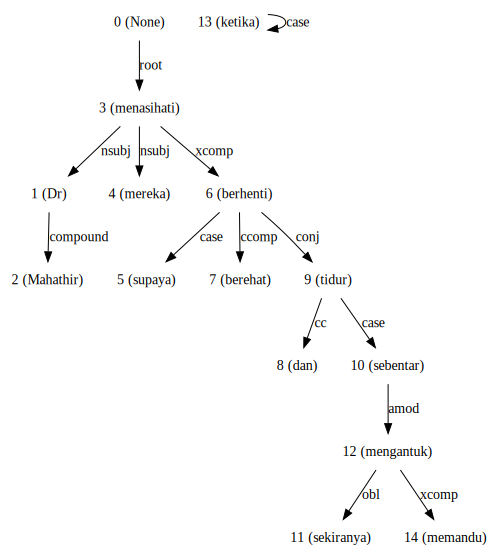

In [12]:
bahdanau = malaya.dependency.deep_model('bahdanau')
d_object, tagging, indexing = bahdanau.predict(string)
d_object.to_graphvis()

## Print important tagging transitions from deep learning model

In [13]:
bahdanau.print_transitions_tag(10)

Top-10 likely transitions:
cc -> conj: 3.898244
punct -> compound:plur: 2.816386
case -> obl: 2.744200
case -> xcomp: 2.671549
case -> nmod: 2.591420
compound:plur -> amod: 1.975937
nsubj:pass -> acl: 1.963712
cop -> ccomp: 1.963573
punct -> fixed: 1.794608
xcomp -> obj: 1.712421

Top-10 unlikely transitions:
root -> root: -8.622316
nsubj:pass -> compound:plur: -7.600410
obl -> compound:plur: -7.044655
obj -> compound:plur: -6.751858
case -> iobj: -6.546042
case -> parataxis: -6.536805
compound:plur -> compound:plur: -6.359083
nummod -> compound:plur: -6.165409
parataxis -> advcl: -6.097473
nmod -> compound:plur: -6.087421


## Print important indexing transitions from deep learning model

In [14]:
bahdanau.print_transitions_index(10)

Top-10 likely transitions:
133 -> 136: 2.720363
108 -> 109: 2.385479
126 -> 127: 2.302784
153 -> 56: 2.086003
88 -> 89: 2.082119
56 -> 158: 2.057645
100 -> 103: 2.021965
136 -> 122: 1.989143
112 -> 113: 1.980897
128 -> 129: 1.962656

Top-10 unlikely transitions:
46 -> 45: -7.945712
1 -> 1: -7.238533
63 -> 62: -6.313935
41 -> 53: -6.211363
37 -> 47: -6.163178
68 -> 67: -6.078556
64 -> 63: -6.066933
27 -> 41: -6.057477
51 -> 59: -6.047529
45 -> 55: -6.034111


## Voting stack model

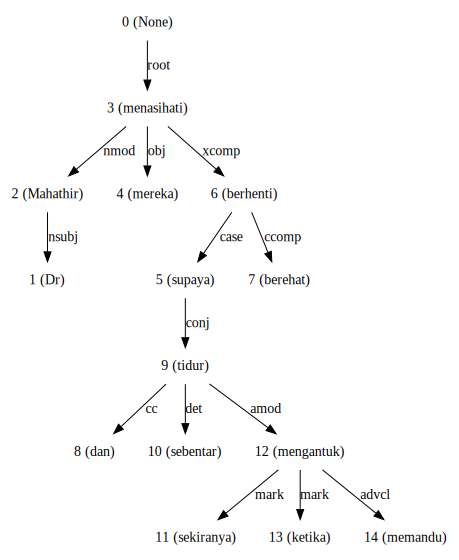

In [15]:
concat = malaya.dependency.deep_model('concat')
bahdanau = malaya.dependency.deep_model('bahdanau')
luong = malaya.dependency.deep_model('luong')
tagging, indexing = malaya.stack.voting_stack([concat, bahdanau, luong], string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()

## Dependency graph object

To initiate a dependency graph from dependency models, you need to call `malaya.dependency.dependency_graph`.

In [16]:
graph = malaya.dependency.dependency_graph(tagging, indexing)
graph

#### generate graphvis

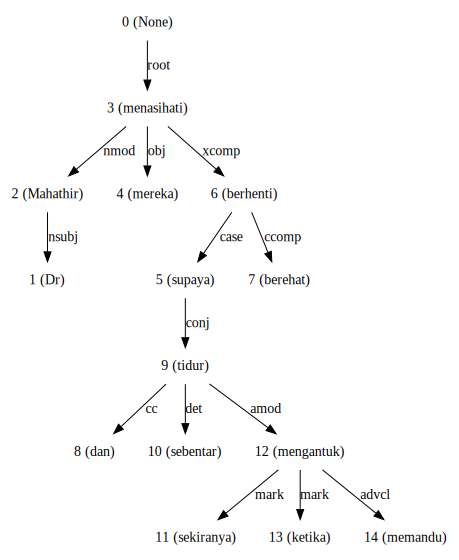

In [17]:
graph.to_graphvis()

#### Get nodes

In [18]:
graph.nodes

defaultdict(<function malaya._utils._parse_dependency.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'root': [3]}),
              'rel': None},
             1: {'address': 1,
              'word': 'Dr',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 2,
              'deps': defaultdict(list, {}),
              'rel': 'nsubj'},
             2: {'address': 2,
              'word': 'Mahathir',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 3,
              'deps': defaultdict(list, {'nsubj': [1]}),
              'rel': 'nmod'},
             3: {'address': 3,
              'word': 'mena

#### Flat the graph

In [19]:
list(graph.triples())

[(('menasihati', '_'), 'nmod', ('Mahathir', '_')),
 (('Mahathir', '_'), 'nsubj', ('Dr', '_')),
 (('menasihati', '_'), 'obj', ('mereka', '_')),
 (('menasihati', '_'), 'xcomp', ('berhenti', '_')),
 (('berhenti', '_'), 'case', ('supaya', '_')),
 (('supaya', '_'), 'conj', ('tidur', '_')),
 (('tidur', '_'), 'cc', ('dan', '_')),
 (('tidur', '_'), 'det', ('sebentar', '_')),
 (('tidur', '_'), 'amod', ('mengantuk', '_')),
 (('mengantuk', '_'), 'mark', ('sekiranya', '_')),
 (('mengantuk', '_'), 'mark', ('ketika', '_')),
 (('mengantuk', '_'), 'advcl', ('memandu', '_')),
 (('berhenti', '_'), 'ccomp', ('berehat', '_'))]

#### Check the graph contains cycles

In [20]:
graph.contains_cycle()

False

#### Generate networkx

Make sure you already installed networkx, `pip install networkx`

In [21]:
digraph = graph.to_networkx()
digraph

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw_networkx(digraph)
plt.show()

<Figure size 640x480 with 1 Axes>

In [23]:
digraph.edges()

OutMultiEdgeDataView([(1, 2), (2, 3), (4, 3), (5, 6), (6, 3), (7, 6), (8, 9), (9, 5), (10, 9), (11, 12), (12, 9), (13, 12), (14, 12)])

In [24]:
digraph.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [25]:
labels = {i:graph.get_by_address(i)['word'] for i in digraph.nodes()}
labels

{1: 'Dr',
 2: 'Mahathir',
 3: 'menasihati',
 4: 'mereka',
 5: 'supaya',
 6: 'berhenti',
 7: 'berehat',
 8: 'dan',
 9: 'tidur',
 10: 'sebentar',
 11: 'sekiranya',
 12: 'mengantuk',
 13: 'ketika',
 14: 'memandu'}

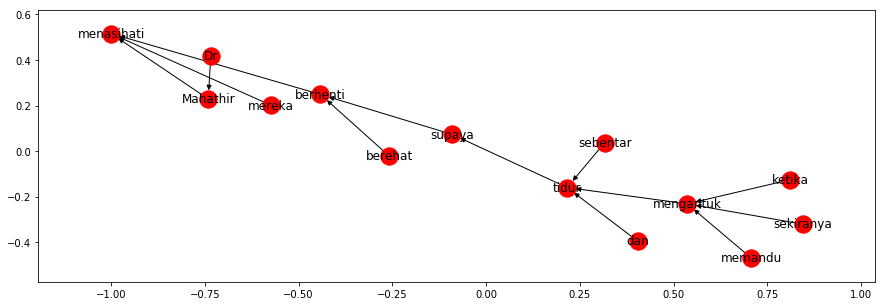

In [26]:
plt.figure(figsize=(15,5))
nx.draw_networkx(digraph,labels=labels)
plt.show()